# Practical 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/d/camnugent/california-housing-prices/housing.csv')

In [3]:
california = fetch_california_housing()
data= pd.DataFrame(california.data, columns=california.feature_names)
target = california.target

In [4]:
x = data[['MedInc']].values
y = target = california.target

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state =42)

In [6]:
degree = 3
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


In [7]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(x_test_poly)

In [9]:
mse=mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.6982964744960335


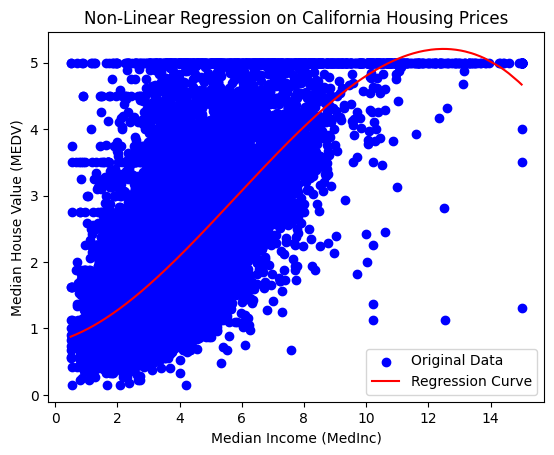

In [10]:
plt.scatter(x,y,color='blue', label='Original Data')
sorted_indices = np.argsort(x_train.flatten())
plt.plot(x_train.flatten()[sorted_indices], model.predict(x_train_poly)[sorted_indices], color='red', label='Regression Curve')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value (MEDV)')
plt.title('Non-Linear Regression on California Housing Prices')
plt.legend()
plt.show()